*Подключение библиотек и импорт данных*

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('S02-hw-dataset.csv', sep=',', encoding='cp1251', skipinitialspace=True, decimal=',')
print(df.head()) # выведем первые 5 строк

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


*Базовый первичный осмотр*

In [10]:
df.info() # выведем основную информацию о столбцах
df.describe() # выведем основные статистики столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


*Обработка дубликатов и пропусков*

In [11]:
print(df.isna().mean()) # посчитаем долю пропусков в столбцах
print(df[df.duplicated()]) # выведем строки, которые являются дубликатами
print('Подозрительные значения id')
print(df[df['user_id'] < 0])
print('Подозрительные значения возраста')
print(df[(df['age'] < 1) | (df['age'] > 100)])
print('Подозрительные значения дохода при 0 количестве купленного')
print(df[((df['purchases'] > 0) & (df['revenue'] == 0)) | (df['revenue'] < 0) | (df['purchases'] < 0) | ((df['purchases'] == 0) & (df['revenue'] > 0))])
df['age'] = df['age'].fillna(df['age'].median())
df = df.drop([5, 10, 40]).reset_index(drop=True)

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511
Подозрительные значения id
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []
Подозрительные значения возраста
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
Подозрительные значения дохода при 0 количестве купленного
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0


Увидели, что есть около 5% пропусков в столбце age и 40ая строка является дубликатом, её нужно удалить.
Так же были найдены противоречия в 5 (возраст 120 лет, отрицательное количество покупок) и 10 (нулевой доход при ненулевых продажах) строчках.
Эти строчки удалим, так как неизвестно, были ли на самом деле совершены покупки или нет.

*Базовый EDA: группировки, агрегаты и частоты*

In [12]:
print(df['country'].value_counts()) # подсчитаем частоты для столбца стран
group_country=df.groupby('country')[['age', 'purchases', 'revenue']].mean() # сгруппируем данные по странам и посчитаем средние значения столбцов по группам
print(group_country)
df['age_group'] = pd.cut(x=df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['Дети', 'Молодые', 'Средний возраст', 'Предпенсионный возраст', 'Пожилые']) # создадим коридоры возрастных групп
print(df)
group_age = df.groupby('age_group', observed=True)['user_id'].count() # подсчитаем количество строчек по возростным группам
print(group_age)

country
RU    12
FR    11
US     7
DE     6
CN     2
Name: count, dtype: int64
               age  purchases      revenue
country                                   
CN       24.000000   4.500000  1054.000000
DE       34.333333   6.500000  1445.500000
FR       39.545455   4.727273   666.000000
RU       30.583333   4.583333   813.333333
US       38.000000   4.714286   637.000000
    user_id   age country  purchases  revenue               age_group
0         1  25.0      FR          7      749                 Молодые
1         2  24.0      RU          5     1115                 Молодые
2         3  52.0      FR          7      399  Предпенсионный возраст
3         4  31.0      RU          6      654                 Молодые
4         5  33.0      DE          6     1296                 Молодые
5         7  46.0      RU          0        0         Средний возраст
6         8  28.0      CN          2      456                 Молодые
7         9  39.0      US          4      980         Средни

Можем увидеть, что чаще всего покупки производились из России, а большенство покупателей находятся в возрасте от 18 до 35 лет. В среднем большего всего товаров за одну покупку совершают из Германии.

*Визуализация данных*

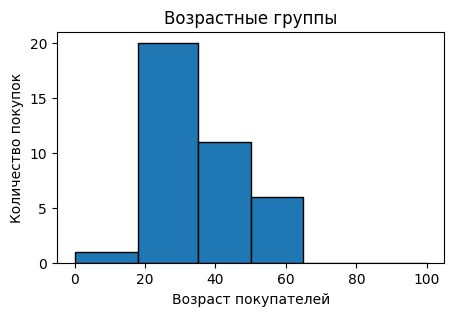

In [24]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(df['age'], bins=[0, 18, 35, 50, 65, 100], edgecolor='black')
ax.set_title('Возрастные группы')
ax.set_ylabel('Количество покупок')
ax.set_xlabel('Возраст покупателей')
plt.savefig('figures/hist.png')

Text(0, 0.5, 'Количество товаров')

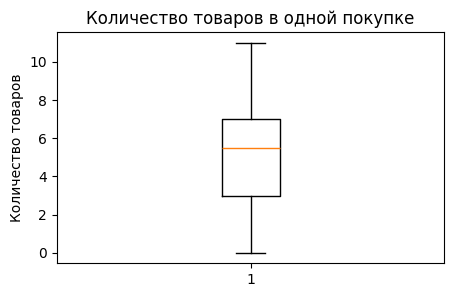

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.boxplot(df['purchases']) 
ax.set_title('Количество товаров в одной покупке')
ax.set_ylabel('Количество товаров')

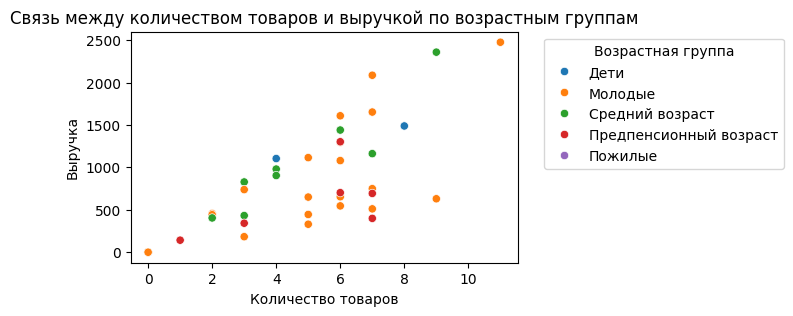

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.scatterplot(x="purchases", y="revenue", hue="age_group", data=df, ax=ax)
ax.set_title('Связь между количеством товаров и выручкой по возрастным группам')
ax.set_ylabel('Выручка')
ax.set_xlabel('Количество товаров')
plt.legend(title='Возрастная группа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('figures/scatterplot.png', bbox_inches='tight')